In [66]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Source signal

In [232]:
# creating the source signal

# parameters for the signal
signal_1_freq = 20 #Hz
signal_2_freq = signal_1_freq/2 #Hz
fs = 1000 #Hz sampling frequency
sample_time = 1 #s


N = sample_time*fs #number of samples in the signal
t = np.linspace(0, sample_time, N) # time vector

# signal vector
signal_1 = 0.5*np.sin(2*np.pi*signal_1_freq*t) 
signal_2 =  np.sin(2*np.pi*signal_2_freq*t) 
signal = signal_1 + signal_2 

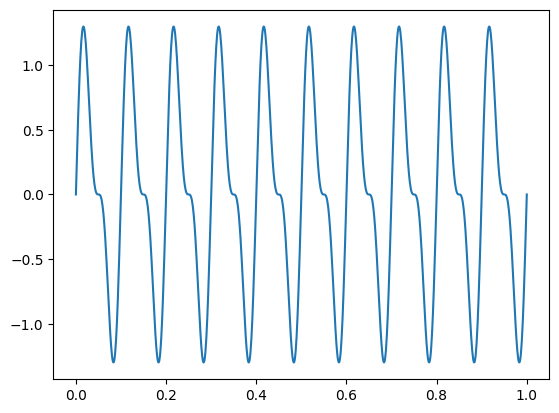

In [233]:
_ = plt.plot(t, signal)

## Noise add

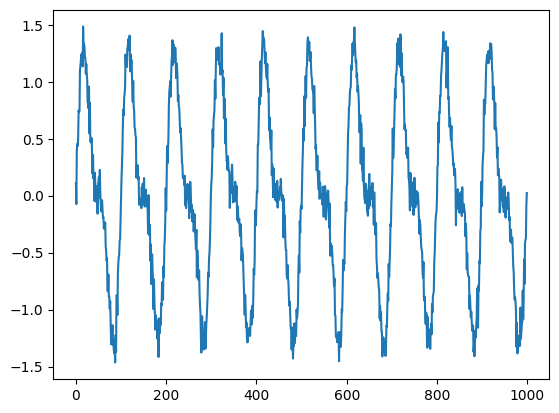

In [237]:
# Generate gaussian noise (white noise)
white_noise = np.random.normal(0, 0.1, N)

# Add noise to the signal
white_noise_signal = signal + white_noise

_ = plt.plot(white_noise_signal)

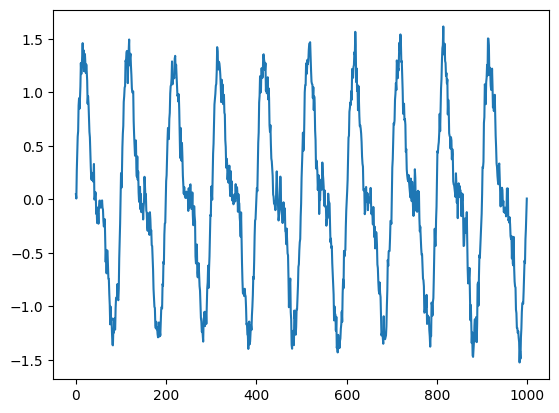

In [238]:
# Generate pink noise
pink_noise = np.random.normal(0, 0.1, N)
pink_noise = sp.signal.lfilter([1], [1, -0.5], pink_noise)

# Add noise to the signal
pink_noise_signal = signal + pink_noise

_ = plt.plot(pink_noise_signal)

## Fourier Analysis

In [246]:
# Now I want to see the signal in the frequency domain
fft_signal = np.fft.fft(signal)

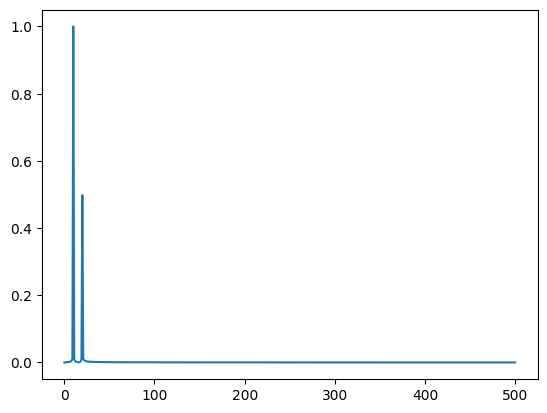

In [247]:
# My frequency axis will be from 0 to fs/2
frequencies = np.linspace(0, fs/2, N//2)

# to plot I want to see only the absolute value of the fft and the first half of the signal (the second half is the mirror of the first)
# I will also normalize the fft 
abs_fft_signal = np.abs(fft_signal)[:N//2] / np.max(np.abs(fft_signal))


plt.plot(frequencies, abs_fft_signal)

In [258]:
# we have two peaks, I want to recuparate the original frequencies
# we can use scipy.signal.find_peaks
peaks, _ = sp.signal.find_peaks(abs_fft_signal, height=0.2) # the height parameter is the minimum height of the peak
peaks

array([10, 20])

### noise fft analisies

In [265]:
fft_white_noise_signal = np.fft.fft(white_noise)
fft_pink_noise_signal = np.fft.fft(pink_noise)

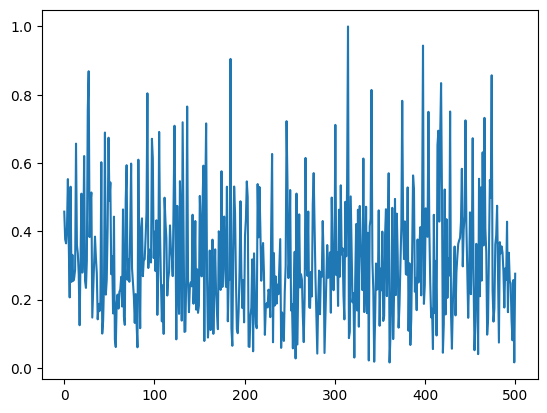

In [266]:
abs_fft_white_noise = np.abs(fft_white_noise_signal)[:N//2] / np.max(np.abs(fft_white_noise_signal))
plt.plot(frequencies, abs_fft_white_noise)

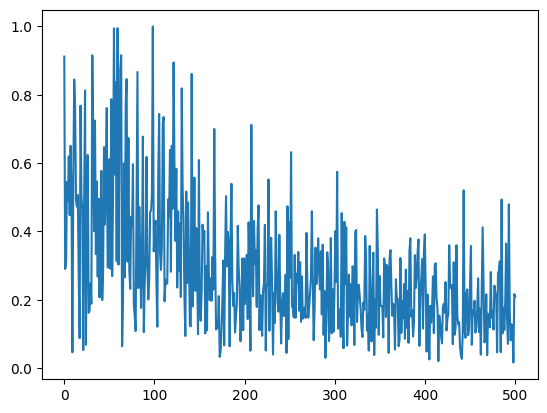

In [268]:
abs_fft_pink_noise = np.abs(fft_pink_noise_signal)[:N//2] / np.max(np.abs(fft_pink_noise_signal))
plt.plot(frequencies, abs_fft_pink_noise)